In [2]:
import pandas as pd
import geopandas as gpd
import os
import pyarrow
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')   

In [4]:
nonag_pur2020_ag_data = pd.read_parquet("/srv/data/my_shared_data_folder/cpr/pur2020_nonag.parquet", engine="fastparquet")

In [13]:
#nonag_pur2020_ag_data = nonag_pur2020_ag_data.sample(frac = 0.001)
list(nonag_pur2020_ag_data.columns)
#nonag_pur2020_ag_data

['use_no',
 'prodno',
 'chem_code',
 'prodchem_pct',
 'lbs_chm_used',
 'lbs_prd_used',
 'amt_prd_used',
 'unit_of_meas',
 'acre_planted',
 'unit_planted',
 'acre_treated',
 'unit_treated',
 'applic_cnt',
 'applic_dt',
 'applic_time',
 'county_cd',
 'base_ln_mer',
 'township',
 'tship_dir',
 'range',
 'range_dir',
 'section',
 'site_loc_id',
 'grower_id',
 'license_no',
 'planting_seq',
 'aer_gnd_ind',
 'site_code',
 'qualify_cd',
 'batch_no',
 'document_no',
 'summary_cd',
 'record_id',
 'comtrs',
 'error_flag',
 'chemalpha_cd',
 'chemname',
 'site_name',
 'COUNTYFP',
 'county_name']

In [14]:
chem_code = nonag_pur2020_ag_data['chem_code'].unique()
#list(chem_code)

In [7]:
nonag_pur2020_ag_data['prodno'].apply(str)
non_ag_distinct_pesticides = nonag_pur2020_ag_data.prodno.unique()
len(non_ag_distinct_pesticides)

636

In [8]:
pest_type = nonag_pur2020_ag_data.groupby("prodno")["lbs_prd_used"].sum()
pest_type = pest_type.reset_index().rename(columns={'lbs_prd_used':'total_amt_used_(lbs)'})
pest_type

,prodno,total_amt_used_(lbs)
0,81,0.0625
1,591,0.0094
2,1485,1.2500
3,1895,1.0725
4,2156,0.5000
...,...,...
631,72257,10.4585
632,72390,5.0662
633,72514,39.4571
634,72547,0.1870


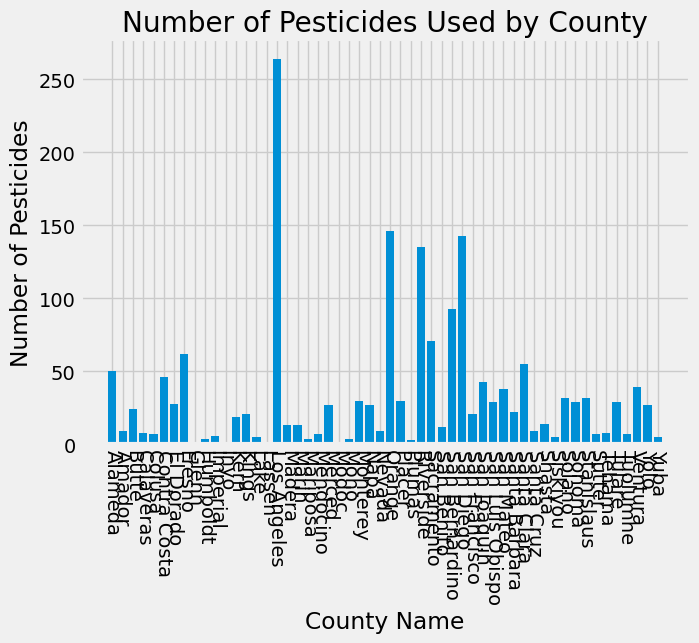

In [10]:
pest_use_county = nonag_pur2020_ag_data.groupby("county_name")["prodno"].count()
pest_use_county = pest_use_county.reset_index()
pest_use_county

plt.figure(figsize=(7,5)) 
plt.bar(x = pest_use_county['county_name'], height= pest_use_county['prodno'])
plt.xticks(rotation=270)                           # Rotate x-labels by 270 degrees
plt.xlabel('County Name')                      # x-label added
plt.ylabel('Number of Pesticides')          # y-label added
plt.title('Number of Pesticides Used by County')  # title added
plt.show()

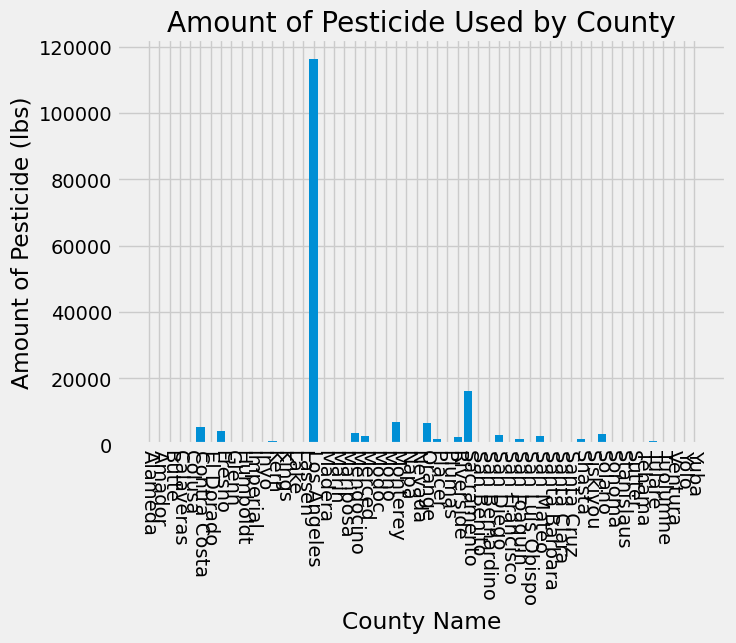

In [11]:
pest_amt_county = nonag_pur2020_ag_data.groupby("county_name")["lbs_prd_used"].sum()
pest_amt_county = pest_amt_county.reset_index()
pest_amt_county

plt.figure(figsize=(7,5)) 
plt.bar(x = pest_amt_county['county_name'], height= pest_amt_county['lbs_prd_used'])
plt.xticks(rotation=270)                           # Rotate x-labels by 270 degrees
plt.xlabel('County Name')                      # x-label added
plt.ylabel('Amount of Pesticide (lbs)')          # y-label added
plt.title('Amount of Pesticide Used by County')  # title added
plt.show()

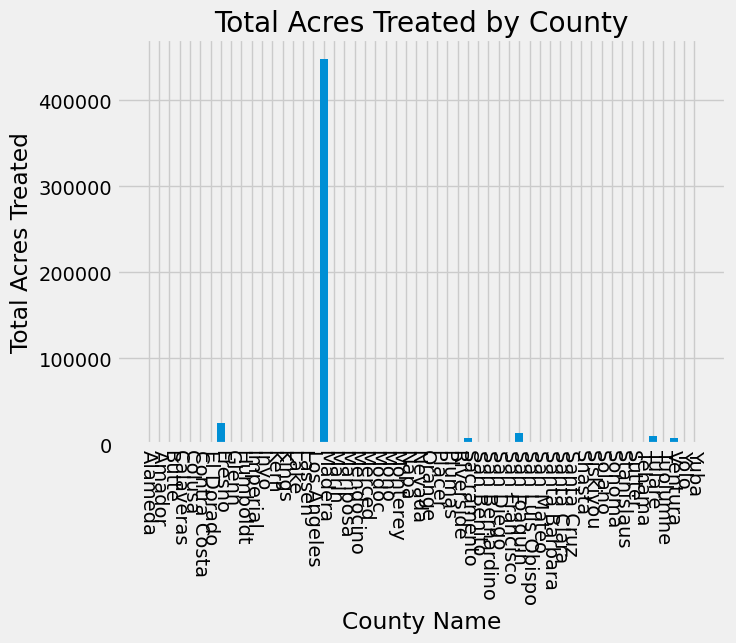

In [15]:
acre_treated_county = nonag_pur2020_ag_data.groupby("county_name")["acre_treated"].sum()
acre_treated_county = acre_treated_county.reset_index()
acre_treated_county

plt.figure(figsize=(7,5)) 
plt.bar(x = acre_treated_county['county_name'], height= acre_treated_county['acre_treated'])
plt.xticks(rotation=270)                           # Rotate x-labels by 270 degrees
plt.xlabel('County Name')                      # x-label added
plt.ylabel('Total Acres Treated')          # y-label added
plt.title('Total Acres Treated by County')  # title added
plt.show()